In [163]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import os
from IPython.display import Audio

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# EDA for one audio

In [164]:
# Extrac one audio file
data, sampling_rate = librosa.load('data/Angry_Female/anger_xn_10.wav')


## Waveplot of Audio

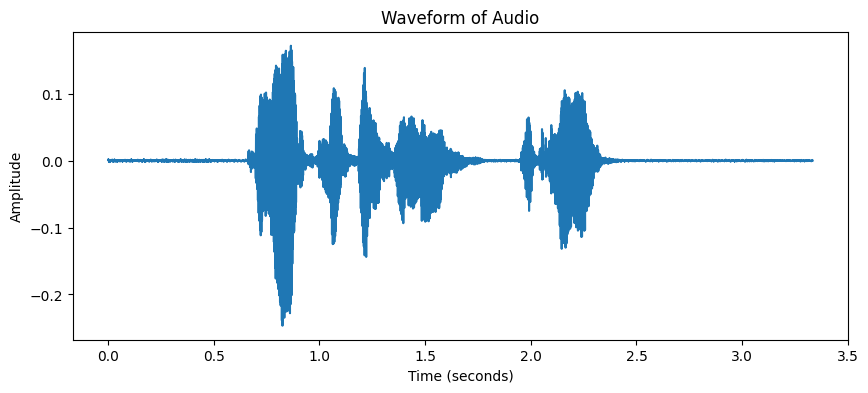

In [165]:
# Get the waveform of the audio file

# Generate time axis values
time = np.linspace(0, len(data)/sampling_rate, num=len(data))
# Plot
plt.figure(figsize=(10, 4))  # Set the figure size
plt.plot(time, data)
plt.title('Waveform of Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


## Magnitude Spectrogram

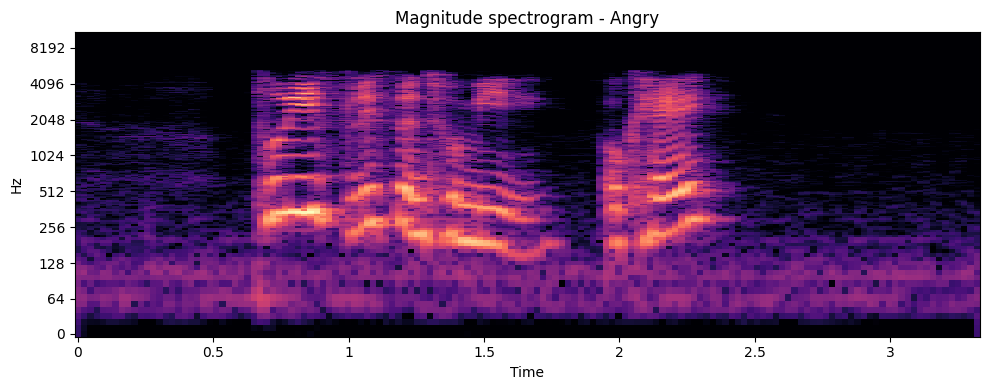

In [166]:
# Get the magnitude spectrogram
D = np.abs(librosa.stft(data))
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Magnitude spectrogram - Angry')
plt.tight_layout()
plt.show()

## MFCC

- Mel-Frequency Cepstral Coefficients(MFCC)
- What is MFCC: https://www.youtube.com/watch?v=4_SH2nfbQZ8

In [167]:
# Get MFCC
mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)
print(mfccs.shape)

(40, 144)


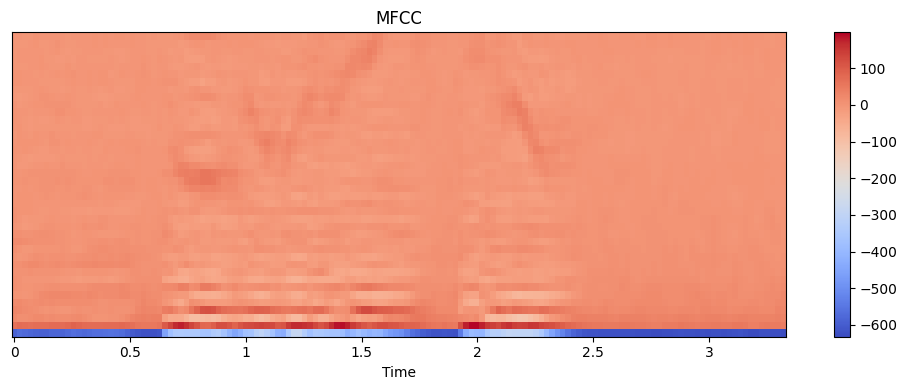

In [168]:
# Displaying  the MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

length of mfcc mean: 144
[-10.642646  -11.2650795 -12.329593  -12.382738  -11.0662775 -11.030466
 -11.332436  -10.003417  -10.253578  -11.111002  -11.060372  -11.45744
 -11.727282  -11.751005  -11.196893  -11.265781  -11.566046  -10.740567
 -11.136945  -11.830854  -10.535223  -10.484119  -10.873392  -10.612274
 -10.431394  -11.70699   -11.661524  -10.798926   -8.383973   -6.5921106
  -6.6471953  -8.361116   -8.822774   -8.460015   -8.293111   -8.841513
  -9.606401   -9.090681   -9.534672  -10.6888    -10.430996   -9.707819
  -8.859522   -8.506189   -7.764447   -7.8102927  -8.611733   -8.311836
  -9.202284  -10.877565  -11.076202  -10.199375  -10.396223  -10.424267
  -8.759944   -8.489058   -8.747853   -8.609545   -8.538904   -8.207651
  -8.649431   -9.679296   -9.506278   -9.723148   -8.977335   -8.647636
  -8.243391   -9.671524  -10.777577  -11.1888895 -11.553155  -11.633398
 -12.572466  -12.963504  -11.115359  -10.469996  -10.749843  -10.995435
 -12.19845   -12.143351  -11.680722  -1

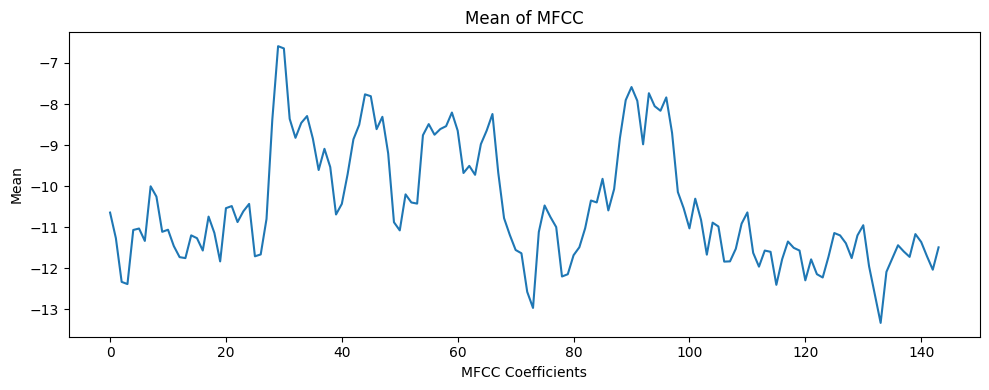

In [169]:
# get the mean of the MFCC
mfccs_mean = np.mean(mfccs, axis=0)
print("length of mfcc mean:" ,len(mfccs_mean))
print(mfccs_mean)


# Displaying the mean of the MFCC
plt.figure(figsize=(10, 4))
plt.plot(mfccs_mean)
plt.title('Mean of MFCC')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean')
plt.tight_layout()
plt.show()

# Data Loading

In [170]:
paths = []
labels = []
genders = []

# Use os.walk to walk through the directory structure
for dirname, _, filenames in os.walk(r'data'):
    for filename in filenames:
        if filename == '.DS_Store':
            continue  # Skip this file
        # Construct the full file path
        full_path = os.path.join(dirname, filename)
        paths.append(full_path)
        
        # Extract label and gender from the directory name
        # Assumes the structure is data/label_gender/filename
        folder_name = os.path.basename(dirname)
        label_gender = folder_name.split('_')
        if len(label_gender) == 2:  # Ensure the folder name is in the expected format
            label, gender = label_gender
        else:
            label, gender = folder_name, 'unknown'  # Default or error handling

        labels.append(label.lower())
        genders.append(gender.lower())

# Create a DataFrame with the collected data
df = pd.DataFrame({
    'speech': paths,
    'label': labels,
    'gender': genders
})

# Display the first few rows of the DataFrame to verify
print(df.head())


                                  speech    label  gender
0  data/Neutral_Female/jt_neutral_21.wav  neutral  female
1  data/Neutral_Female/ws_neutral_25.wav  neutral  female
2  data/Neutral_Female/ws_neutral_31.wav  neutral  female
3  data/Neutral_Female/ws_neutral_19.wav  neutral  female
4   data/Neutral_Female/neutral_xn_1.wav  neutral  female


In [171]:
df

speech    label  gender
0    data/Neutral_Female/jt_neutral_21.wav  neutral  female
1    data/Neutral_Female/ws_neutral_25.wav  neutral  female
2    data/Neutral_Female/ws_neutral_31.wav  neutral  female
3    data/Neutral_Female/ws_neutral_19.wav  neutral  female
4     data/Neutral_Female/neutral_xn_1.wav  neutral  female
..                                     ...      ...     ...
650           data/Sad_Male/sad_xnm_25.wav      sad    male
651           data/Sad_Male/sad_xnm_24.wav      sad    male
652           data/Sad_Male/sad_xnm_30.wav      sad    male
653            data/Sad_Male/ew_sad-16.wav      sad    male
654             data/Sad_Male/ew_sad-4.wav      sad    male

[655 rows x 3 columns]

In [172]:
# Check the distribution of labels
print(df['label'].value_counts())

print()
# Check the distribution of gender
print(df['gender'].value_counts())

happy      172
angry      168
neutral    159
sad        156
Name: label, dtype: int64

female    369
male      286
Name: gender, dtype: int64


# EDA for each emotions

In [173]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr, color="blue")
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

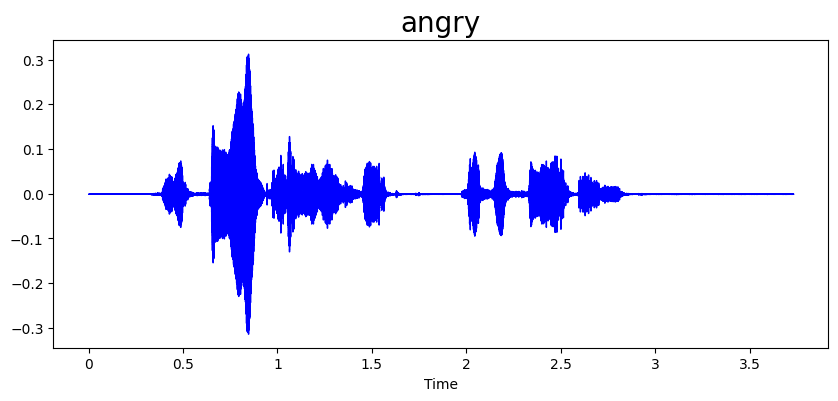

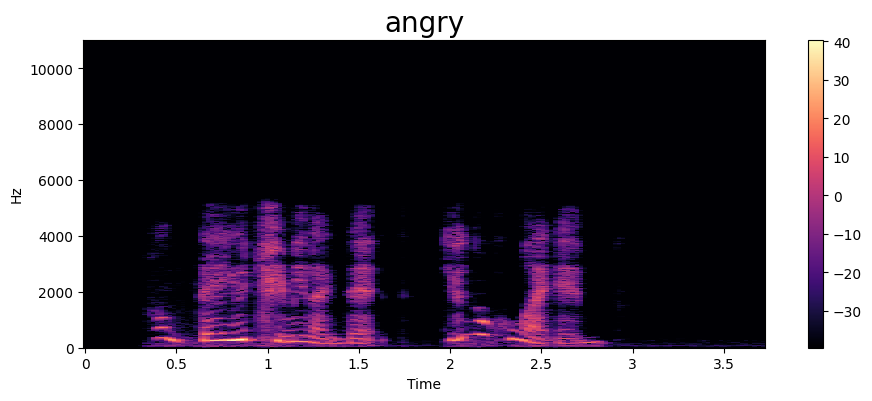

In [174]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[150]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

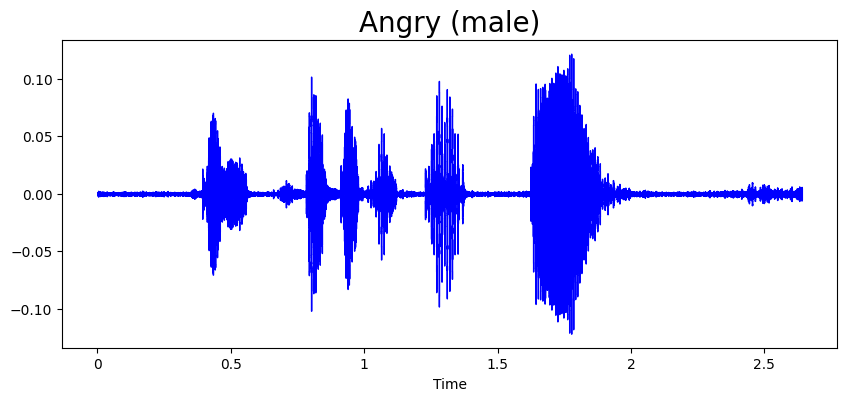

Playing Audio: Angry (male)


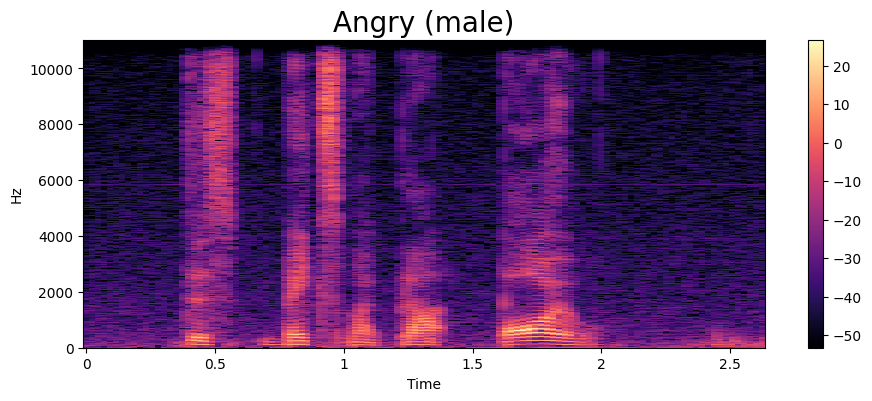

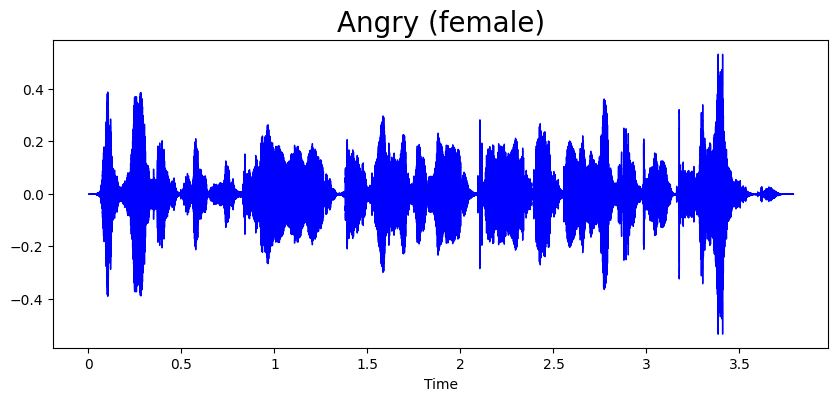

Playing Audio: Angry (female)


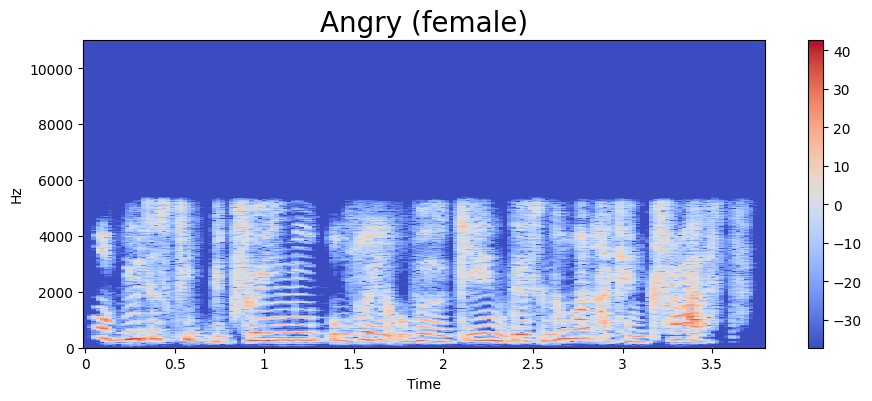

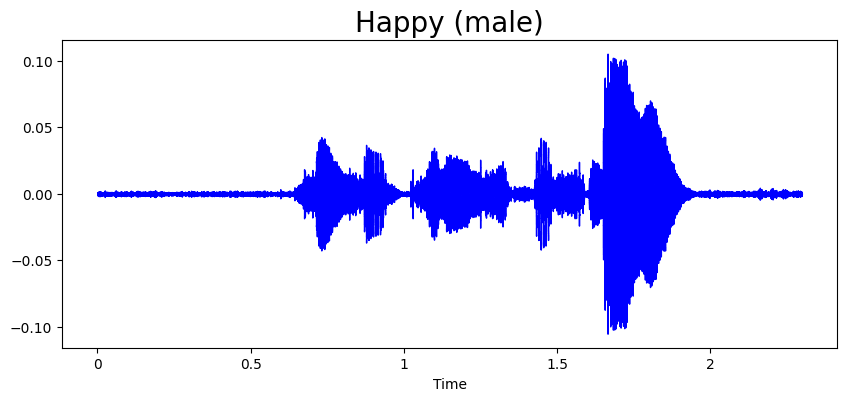

Playing Audio: Happy (male)


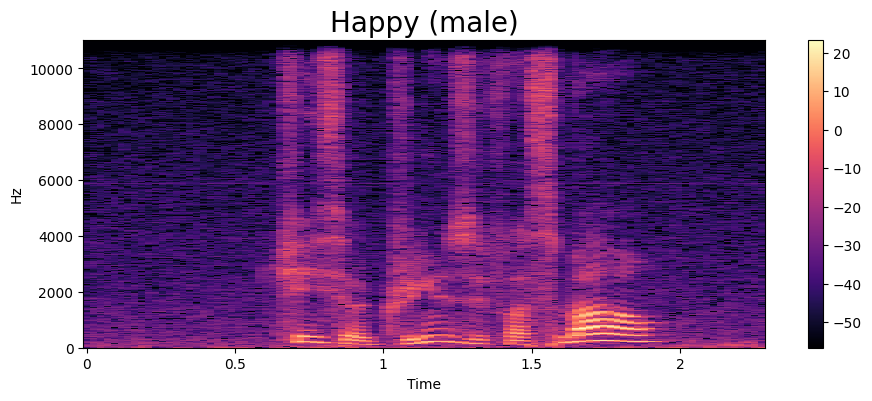

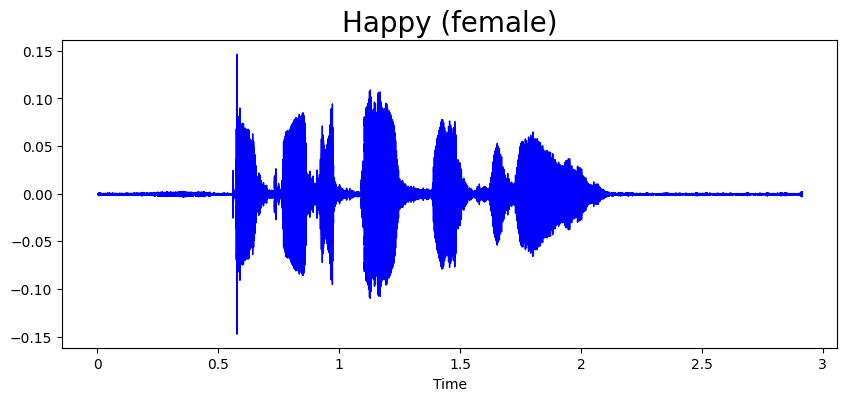

Playing Audio: Happy (female)


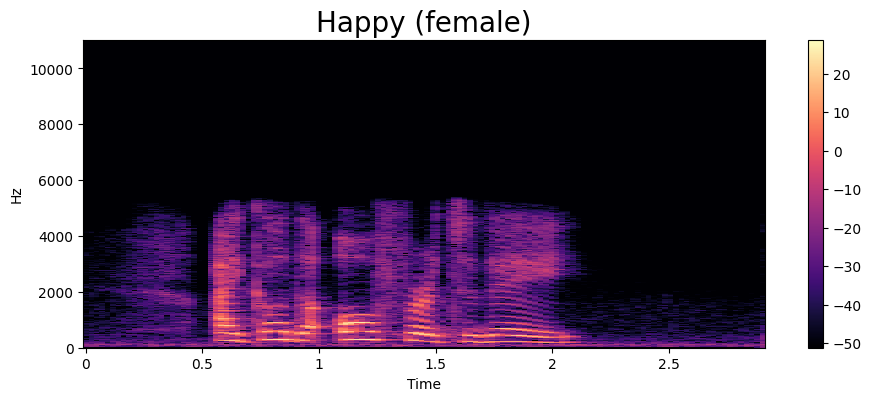

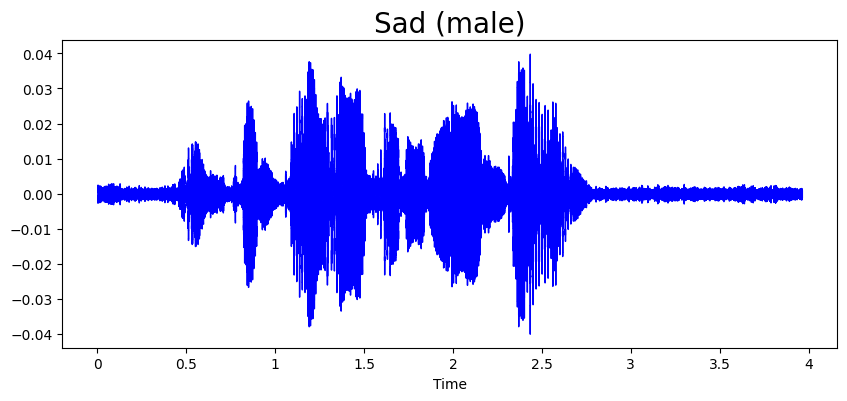

Playing Audio: Sad (male)


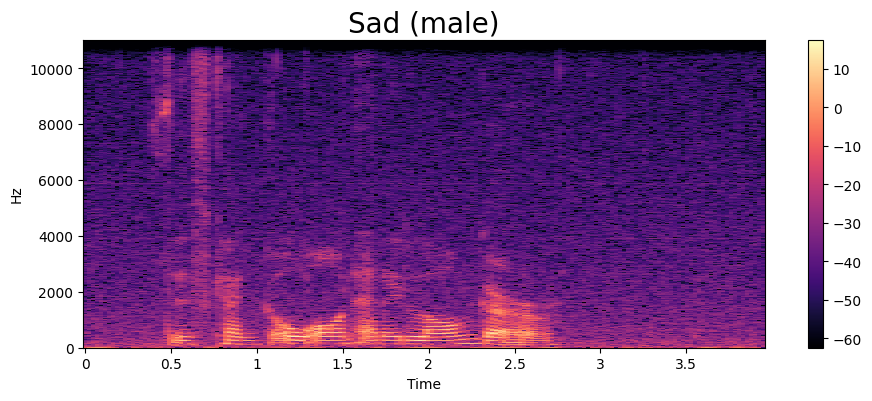

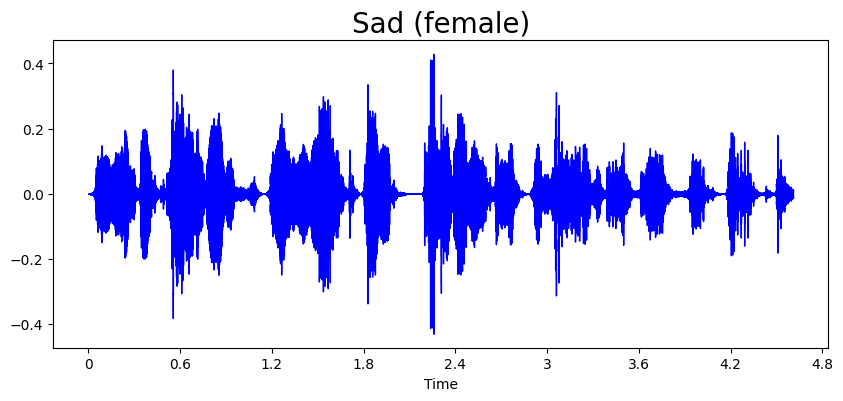

Playing Audio: Sad (female)


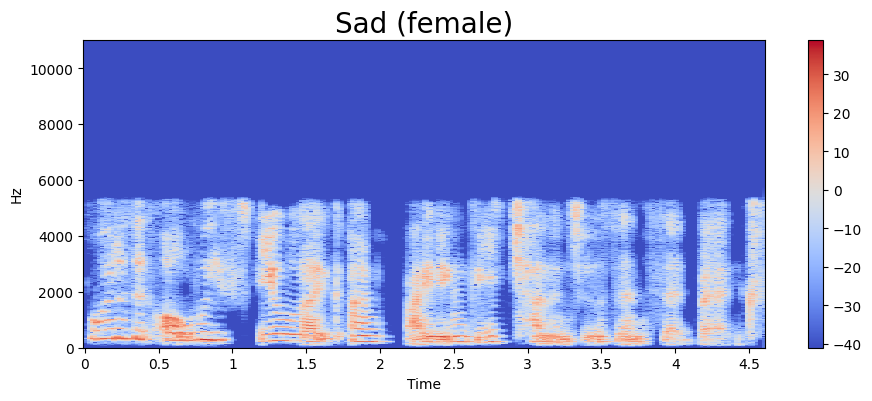

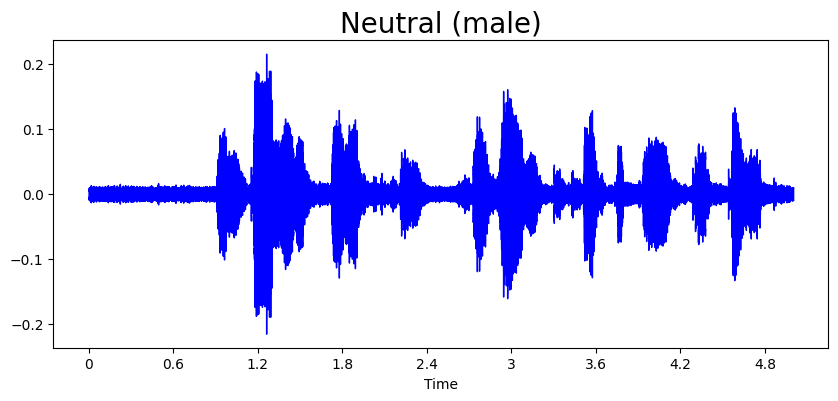

Playing Audio: Neutral (male)


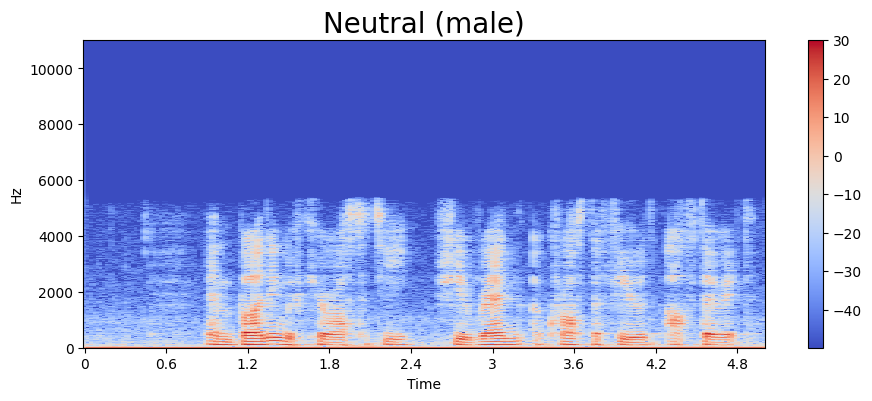

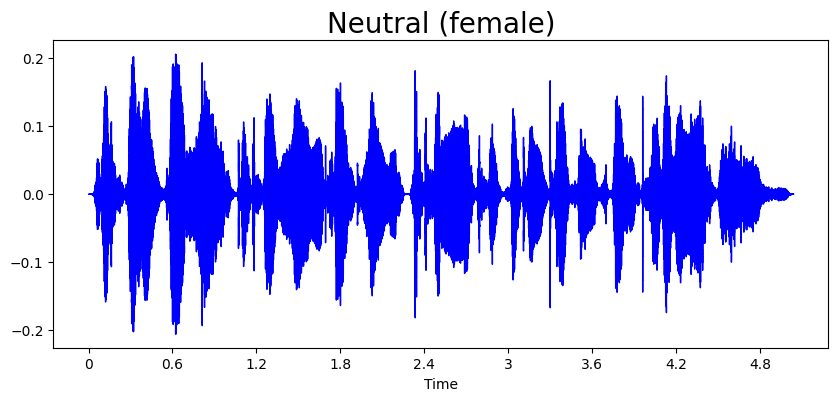

Playing Audio: Neutral (female)


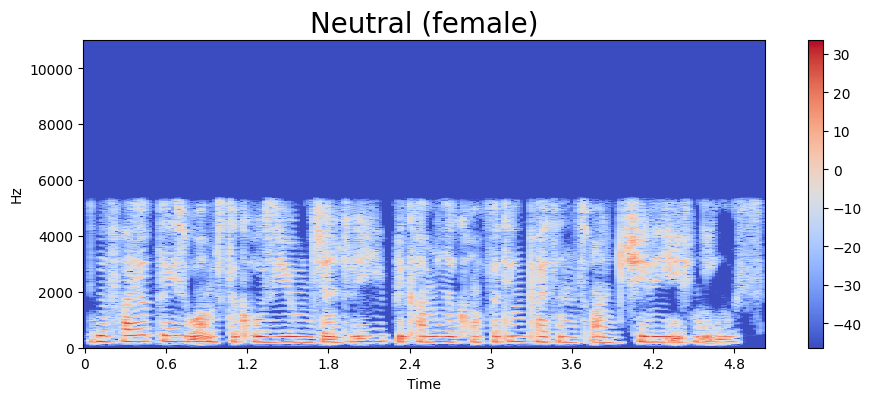

In [175]:
# List of emotions and genders to iterate over
emotions = ['angry', 'happy', 'sad', 'neutral']
genders = ['male', 'female']

# Iterate over each combination of emotion and gender
for emotion in emotions:
    for gender in genders:
        # Filter the DataFrame for the specific emotion and gender
        filtered_df = df[(df['label'] == emotion) & (df['gender'] == gender)]
        
        # Check if there are any entries for this combination
        if not filtered_df.empty:
            # choose a random file
            random_index = np.random.randint(0, len(filtered_df))
            path = filtered_df['speech'].iloc[random_index]
            data, sampling_rate = librosa.load(path)
            
            # Plot and play the audio
            title = f"{emotion.capitalize()} ({gender})"
            waveplot(data, sampling_rate, title)
            spectogram(data, sampling_rate, title)
            print(f"Playing Audio: {title}")
            display(Audio(path))
        else:
            print(f"No data for combination: {emotion.capitalize()} ({gender})")


# Summary Plot

## Waveplot

In [176]:
# Function to plot waveplot for a given emotion and gender
def plot_emotion_waveplot(df, gender, ax, emotion, name):
    # Filter the DataFrame for the specific emotion and gender
    filtered_df = df[(df['label'] == emotion) & (df['gender'] == gender) & df['speech'].str.contains(name)]
    
    if not filtered_df.empty:
        random_index = np.random.randint(0, len(filtered_df))
        path = filtered_df['speech'].iloc[random_index]
        data, sampling_rate = librosa.load(path)
                        
        # Plotting
        librosa.display.waveshow(data, sr=sampling_rate, color='blue', ax=ax)
        ax.set_title(f'{emotion.capitalize()}')
    else:
        ax.set_title(f'No data for {emotion.capitalize()}')
        ax.axis('off')  # Hide axes for empty plots

Male Four Emotions

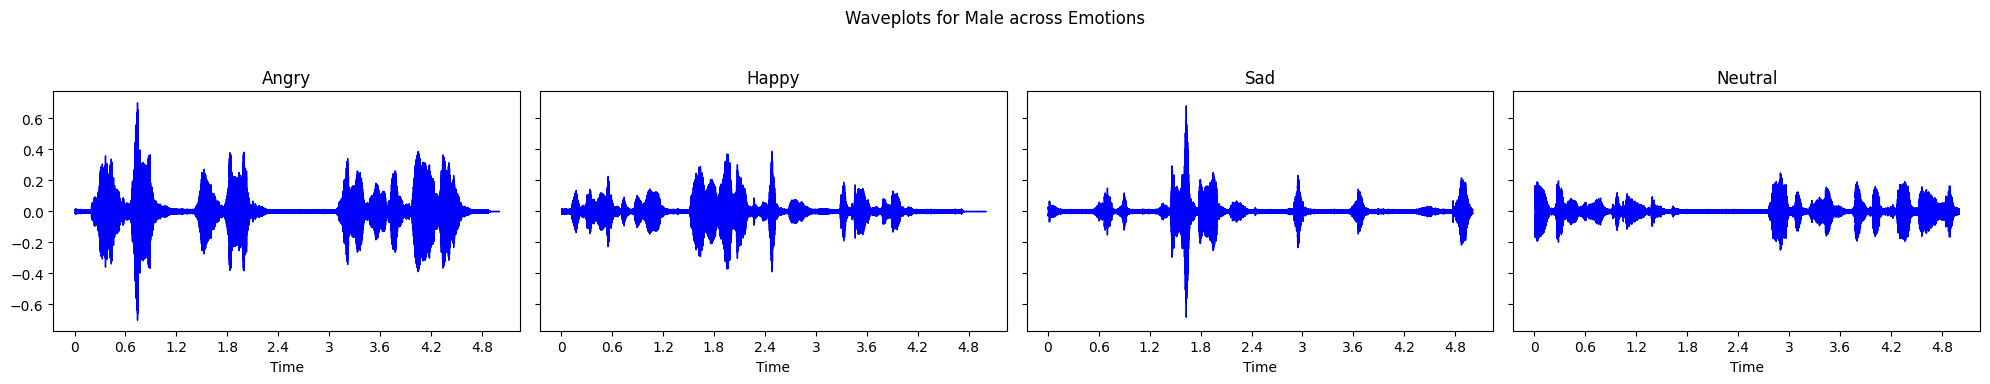

In [177]:
selected_gender = 'male'
name = 'ew'

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)

for i, emotion in enumerate(emotions):
    plot_emotion_waveplot(df, selected_gender, axs[i], emotion, name)

plt.suptitle(f'Waveplots for {selected_gender.capitalize()} across Emotions')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit suptitle
plt.show()

Female four emotions

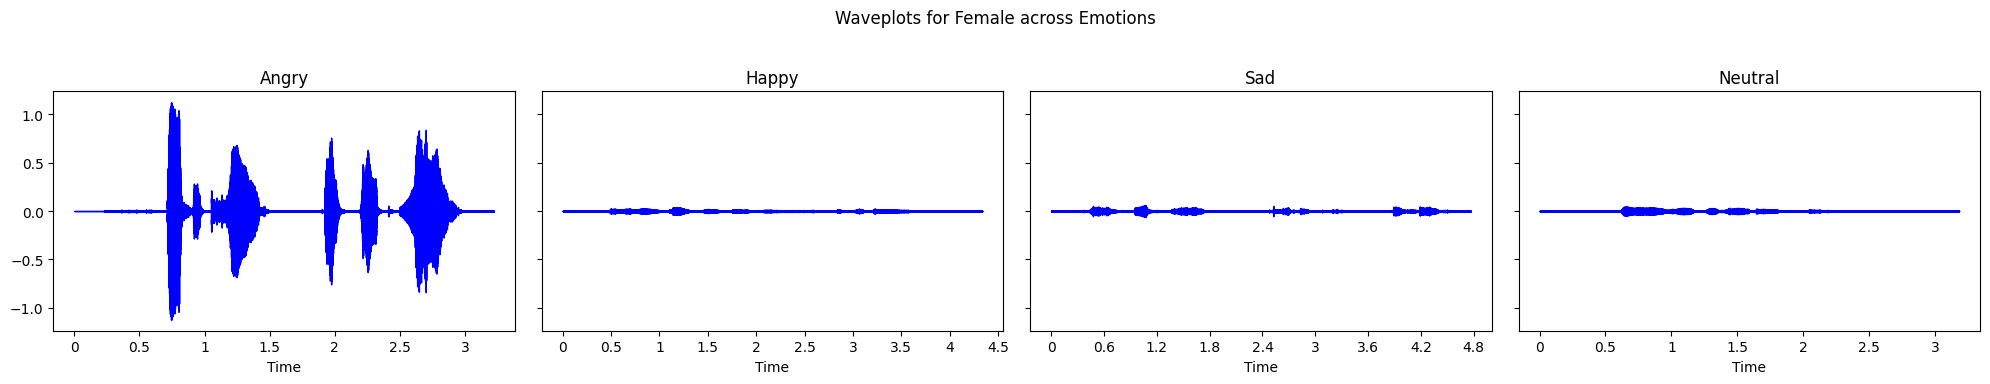

In [178]:
selected_gender = 'female'
name = 'xn'

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)

for i, emotion in enumerate(emotions):
    plot_emotion_waveplot(df, selected_gender, axs[i], emotion, name)

plt.suptitle(f'Waveplots for {selected_gender.capitalize()} across Emotions')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit suptitle
plt.show()

## Spectrum

In [179]:
def plot_emotion_spectrogram(df, gender, ax, emotion, name):
    # Filter the DataFrame for the specific emotion and gender
    filtered_df = df[(df['label'] == emotion) & (df['gender'] == gender) & df['speech'].str.contains(name)]
    
    if not filtered_df.empty:
        # Select a random audio file from the filtered DataFrame
        random_index = np.random.randint(0, len(filtered_df))
        path = filtered_df['speech'].iloc[random_index]
        data, sampling_rate = librosa.load(path)
        
        # Compute the Mel spectrogram
        S = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128, fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        # Plotting
        img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sampling_rate, fmax=8000, ax=ax)
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title=f'{emotion.capitalize()}')
    else:
        ax.set(title=f'No data for {emotion.capitalize()}')
        ax.axis('off')  # Hide axes for empty plots

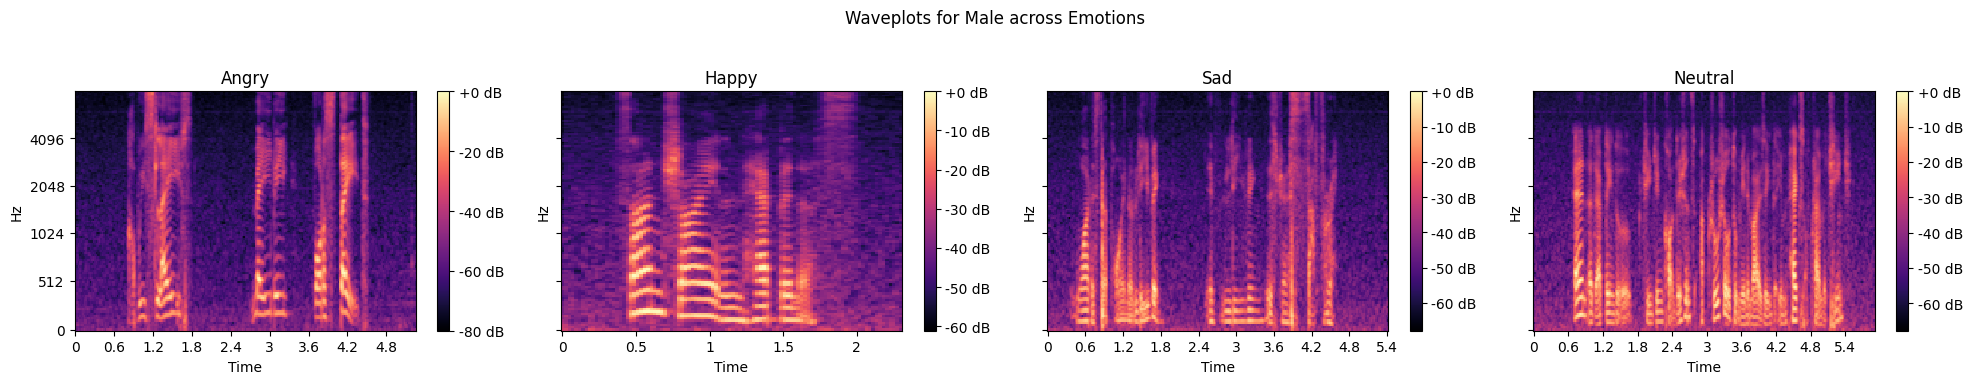

In [180]:
# Choose a gender to display
selected_gender = 'male'
name = 'ml'

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)

for i, emotion in enumerate(emotions):
    plot_emotion_spectrogram(df, selected_gender, axs[i], emotion, name)

plt.suptitle(f'Waveplots for {selected_gender.capitalize()} across Emotions')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit suptitle
plt.show()

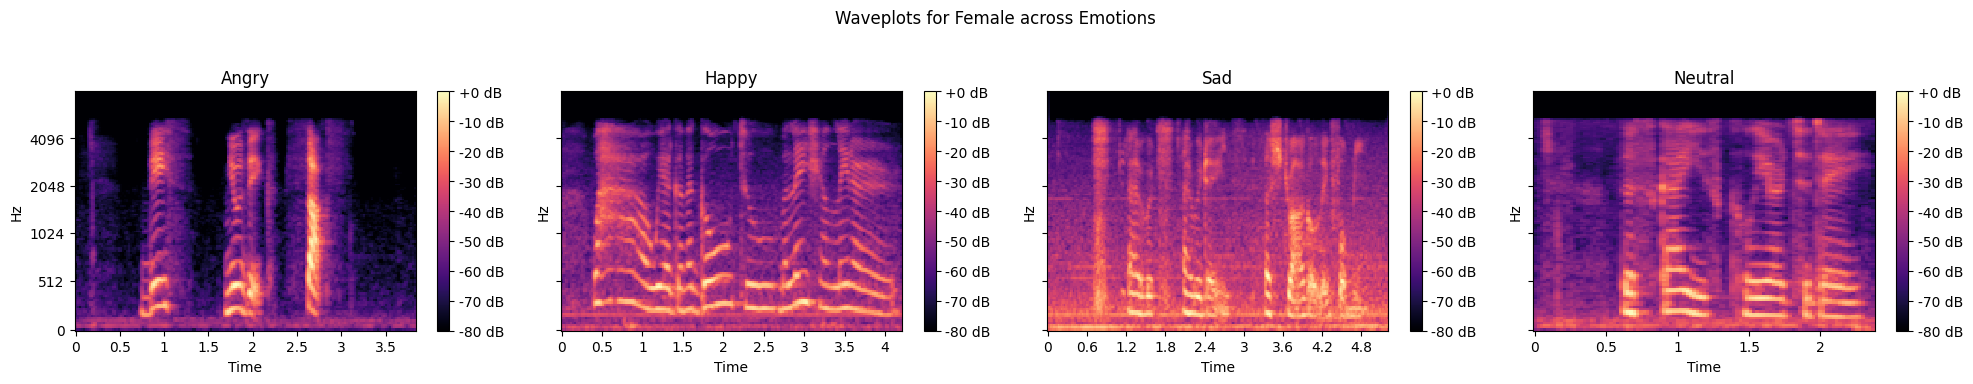

In [181]:
selected_gender = 'female'
name = 'xn'

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)

for i, emotion in enumerate(emotions):
    plot_emotion_spectrogram(df, selected_gender, axs[i], emotion, name)

plt.suptitle(f'Waveplots for {selected_gender.capitalize()} across Emotions')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit suptitle
plt.show()

## MFCC

In [182]:
# Function to plot MFCC and its mean for a given emotion and gender
def plot_emotion_mfcc(df, gender, emotion, name, ax):
    # Filter the DataFrame for the specific emotion and gender
    filtered_df = df[(df['label'] == emotion) & (df['gender'] == gender) & df['speech'].str.contains(name)]
    
    # Select a random audio file from the filtered DataFrame
    random_index = np.random.randint(0, len(filtered_df))
    path = filtered_df['speech'].iloc[random_index]
    data, sampling_rate = librosa.load(path)
    
    # Get MFCCs from the audio
    mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)
    mfccs_mean = np.mean(mfccs, axis=0)

    # Displaying the mean of the MFCC                     
    ax.plot(mfccs_mean)
    ax.set_title(f'Mean of MFCC for {emotion.capitalize()} ({gender})')
    ax.set_xlabel('MFCC Coefficients')
    ax.set_ylabel('Mean')
    ax.set_xlim(0, 40)
    ax.set_ylim(-15, -4)

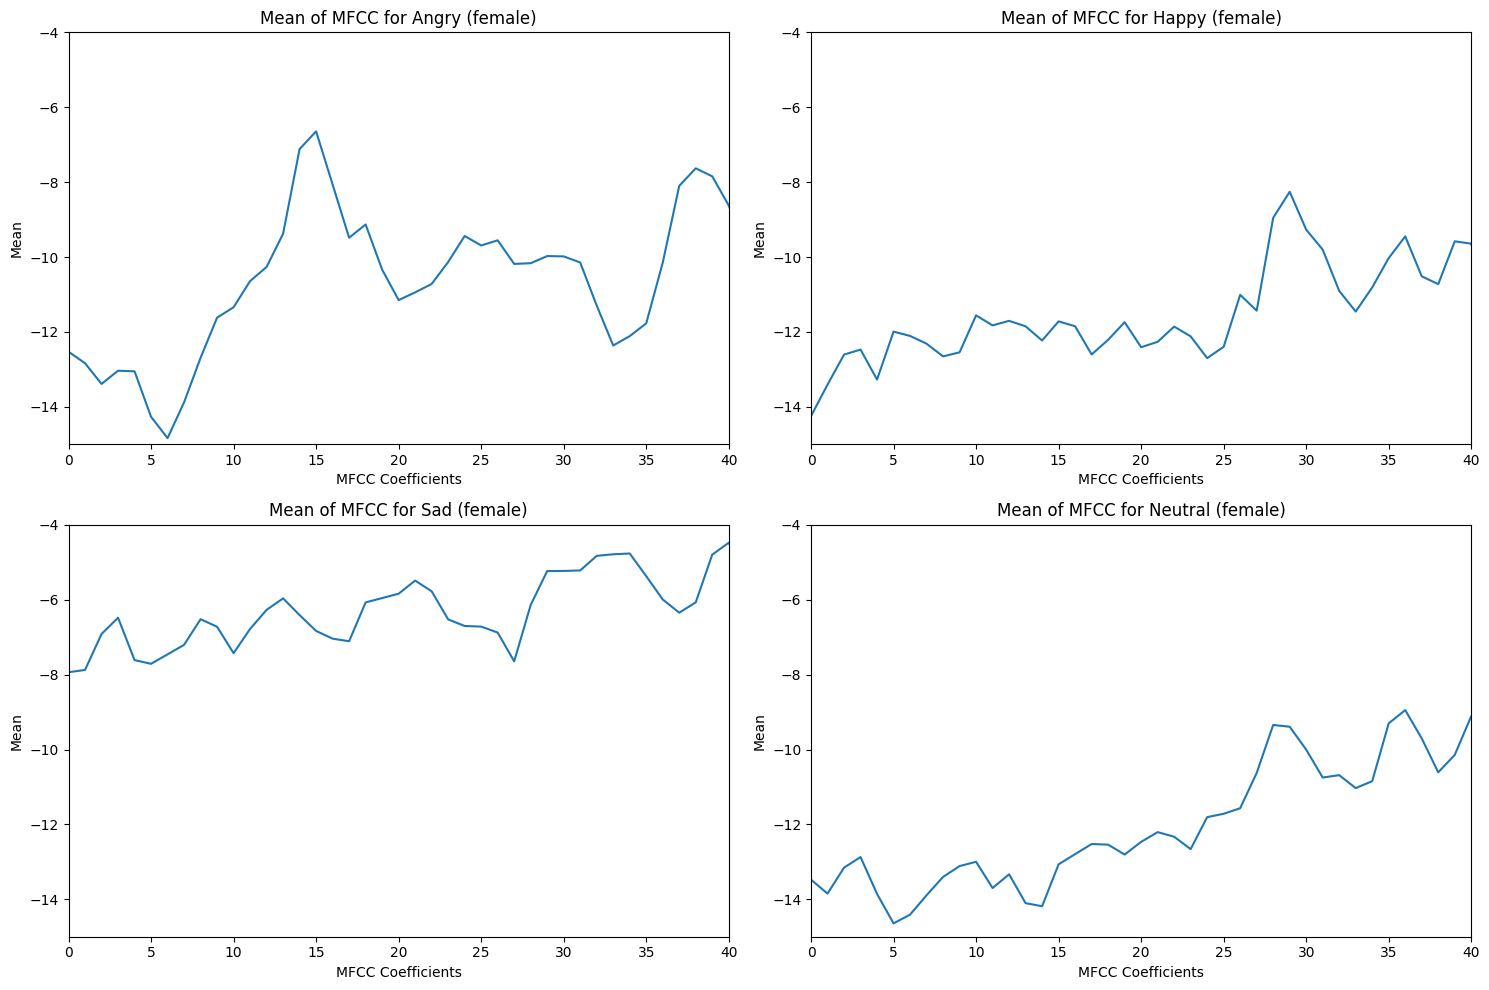

In [183]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust the size as needed
axs = axs.flatten()  # Flatten the array of axes for easy indexing

# List of emotions and gender to plot
emotions = ['angry', 'happy', 'sad', 'neutral']
selected_gender = 'female'  # Specify the gender
name = 'xn'  # Part of the filename to filter by

# Plot MFCCs for each emotion in its own subplot
for i, emotion in enumerate(emotions):
    plot_emotion_mfcc(df, selected_gender, emotion, name, axs[i])

plt.tight_layout()
plt.show()

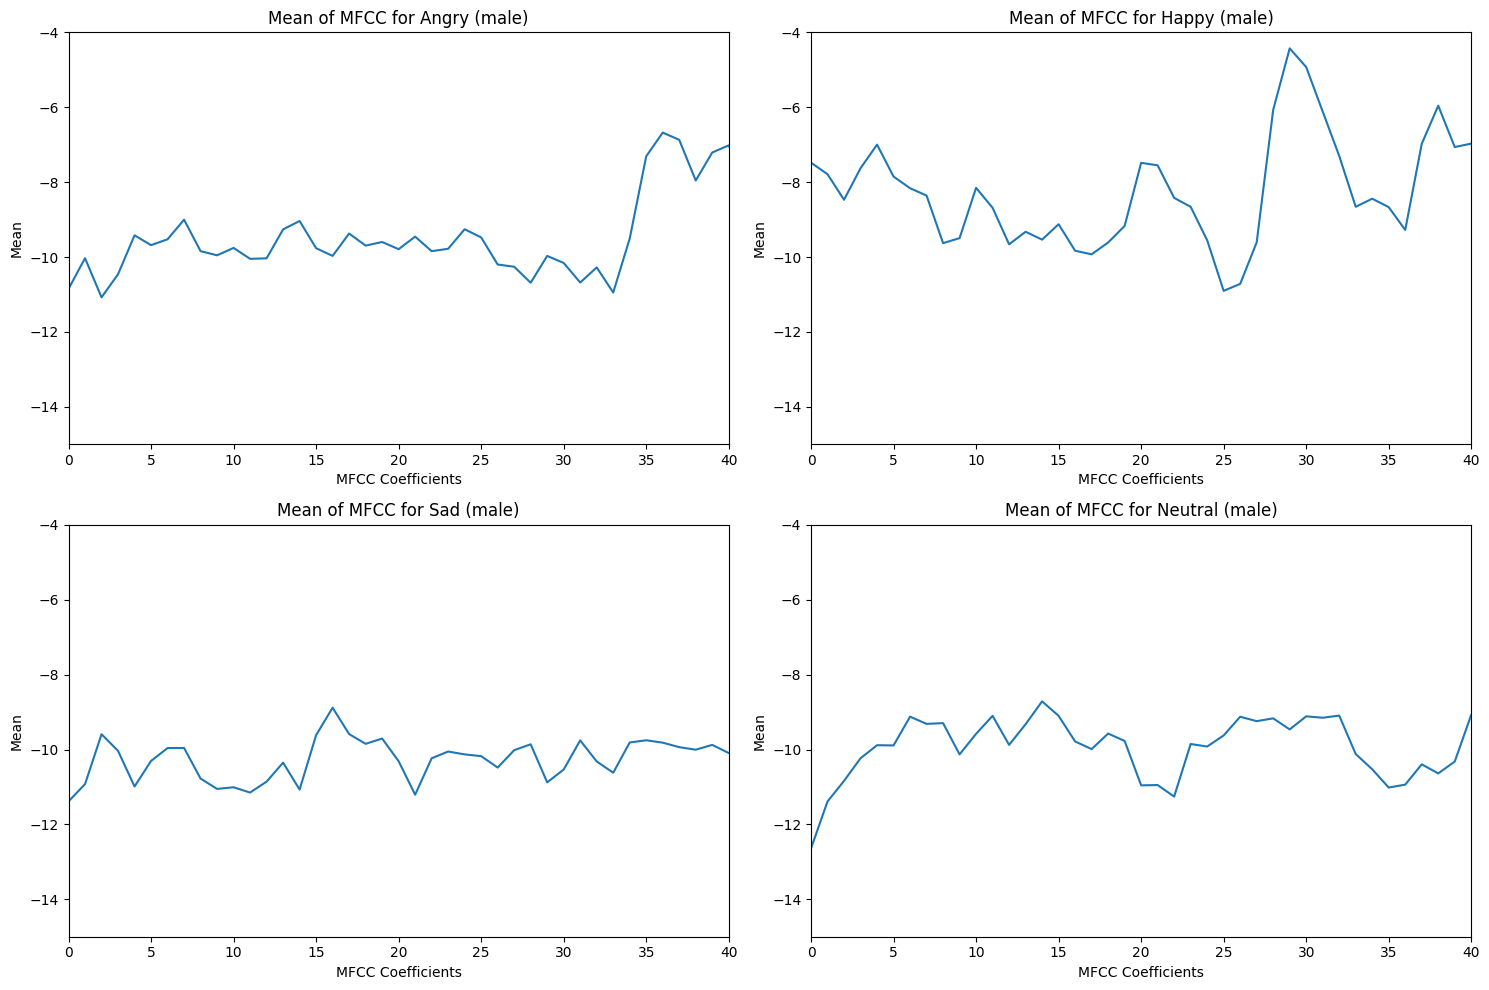

In [184]:
# Create a figure for subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust the size as needed
axs = axs.flatten()  # Flatten the array of axes for easy indexing

# List of emotions and gender to plot
emotions = ['angry', 'happy', 'sad', 'neutral']
selected_gender = 'male'  # Specify the gender
name = 'ml'  # Part of the filename to filter by

# Plot MFCCs for each emotion in its own subplot
for i, emotion in enumerate(emotions):
    plot_emotion_mfcc(df, selected_gender, emotion, name, axs[i])

plt.tight_layout()
plt.show()

In [185]:
# Convert audio files: Ensure all audio files are in a uniform format (e.g., WAV) and sample rate.
# Noise Reduction: Apply noise reduction techniques to clean up the audio, if necessary.
# Segmentation: Sometimes, you might need to segment longer audio files into shorter clips that are more manageable and consistent in length.

# Feature Extraction

In [186]:
# Extract relevant features: Common features for emotion recognition include Mel-Frequency Cepstral Coefficients (MFCCs), Chroma features, Mel-spectrogram, spectral contrast, and tonnetz. These features can capture the nuances in speech that correlate with different emotions.
# Normalization: Normalize features to ensure that the scale of the features does not negatively impact the performance of your ML model.


# Extracting features from audio files
def extract_features(file_path):
    # Load the audio file
    data, sampling_rate = librosa.load(file_path)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)
    mfccs_mean = np.mean(mfccs, axis=0)

    # Extract other features (e.g., chroma, mel-spectrogram, spectral contrast, tonnetz)
    # chroma = librosa.feature.chroma_stft(y=data, sr=sampling_rate)

    return mfccs_mean

# Create a dataframe to store the features
df = pd.DataFrame(columns=['File_name','Label','MFCC'])
# Loop through each audio file and extract features
# four emotions: anger, fear, joy, and neutral which are four folders
emotions = ['anger', 'fear', 'joy', 'neutral']
# loop through each folder and extract the features


# Data Splitting

# Modelling

Baseline Model, CNN, RNN, LSTM

# Evaluation